# Q2 : Plot the distribution of BoxOffice collections in the combined dataset
What is your inference?

Are there any outliers? Who are they?


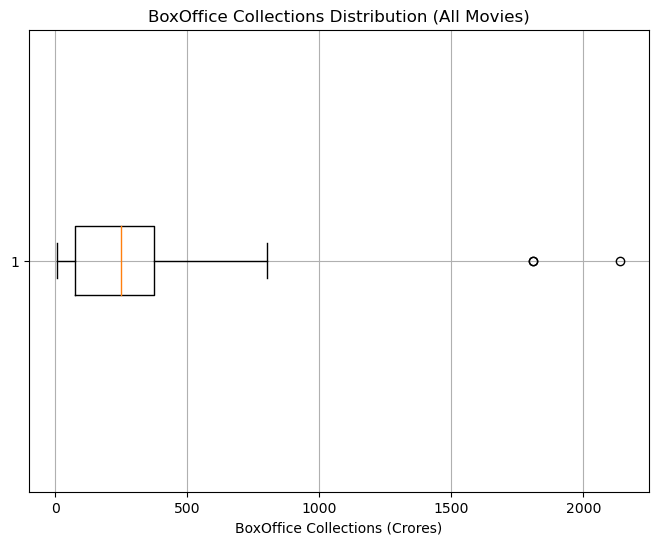

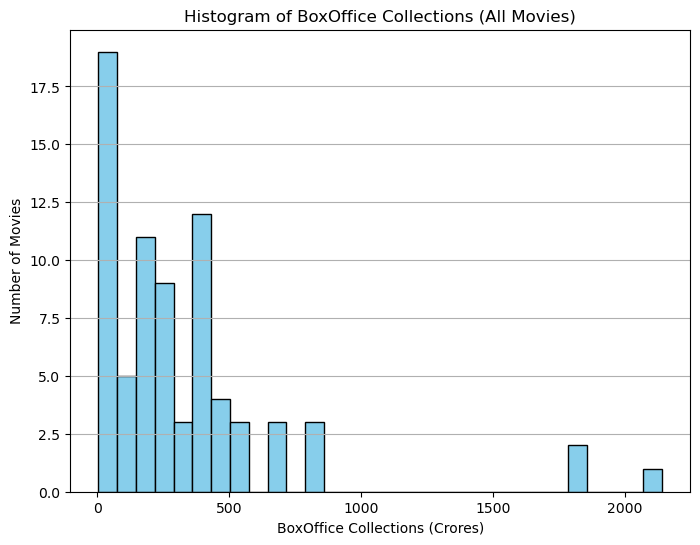


Detected 2 outlier movies with unusually high BoxOffice collections:

Outlier movies are:
- Baahubali 2: The Conclusion: 1810 Crores
- Dangal: 2140 Crores


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
indian_movies = pd.read_excel('cleaned_movies_data/cleaned_indian_movies.xlsx')
bollywood_movies = pd.read_excel('cleaned_movies_data/cleaned_bollywood_movies.xlsx')
tollywood_movies = pd.read_excel('cleaned_movies_data/cleaned_tollywood_movies.xlsx')

# Combine all datasets
combined_movies = pd.concat([indian_movies, bollywood_movies, tollywood_movies], ignore_index=True)

# Plot distribution of BoxOffice collections using boxplot
plt.figure(figsize=(8,6))
plt.boxplot(combined_movies['BoxOffice (Crores)'].dropna(), vert=False)
plt.title('BoxOffice Collections Distribution (All Movies)')
plt.xlabel('BoxOffice Collections (Crores)')
plt.grid(True)
plt.savefig('Q2_output1.png')
plt.show()

# Also plot histogram to see overall distribution
plt.figure(figsize=(8,6))
plt.hist(combined_movies['BoxOffice (Crores)'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of BoxOffice Collections (All Movies)')
plt.xlabel('BoxOffice Collections (Crores)')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.savefig('Q2_output2.png')
plt.show()

# Detect outliers using IQR method
boxoffice = combined_movies['BoxOffice (Crores)'].dropna()
Q1 = boxoffice.quantile(0.25)
Q3 = boxoffice.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers above the upper bound (usual trend is to consider outliers on high side here)
outliers = combined_unique[combined_unique['BoxOffice (Crores)'] > upper_bound]

print(f"\nDetected {len(outliers)} outlier movies with unusually high BoxOffice collections:\n")
print("Outlier movies are:")
for idx, row in outliers.iterrows():
    print(f"- {row['Title']}: {row['BoxOffice (Crores)']} Crores")


## Inference
1. The box plot visualizes the distribution of BoxOffice collections across all movies. It shows the median, quartiles, and potential outliers.
2. The histogram provides a more detailed view of the distribution, indicating how many movies fall into specific BoxOffice collection ranges.

## Outliers
Yes, there are outliers in the data. They are :
1. Baahubali 2: The Conclusion: 1810 Crores
2. Dangal: 2140 Crores